找到左转车辆

In [2]:
import pandas as pd

# 读取 CSV 文件
df = pd.read_csv(r'D:\work\advance-car\transportation_data_complete_cleaned_top100000.csv')

# 先对整个数据按 vehicle_id 和 frame_id 进行排序
df_sorted = df.sort_values(['vehicle_id', 'frame_id'])

# 按 vehicle_id 分组
grouped = df_sorted.groupby('vehicle_id')

# 计算每个车辆的 local_x 和 local_y 的变化
df_sorted['delta_x'] = grouped['local_x'].diff()
df_sorted['delta_y'] = grouped['local_y'].diff()

# 判断可能的左转行为：local_x 减小且 local_y 增大
df_sorted['possible_left_turn'] = (df_sorted['delta_x'] < 0) & (df_sorted['delta_y'] > 0)

# 结合 direction 和 movement 进一步确认左转行为
# 假设 4 代表左转方向，1 代表左转动作，这里根据实际情况调整
left_turn_vehicles = df_sorted[((df_sorted['direction'] == 4) | (df_sorted['movement'] == 1)) & df_sorted['possible_left_turn']]['vehicle_id'].unique()

print('左转车辆的 vehicle_id：', left_turn_vehicles)

左转车辆的 vehicle_id： [  11   14   15   16   17   18   21   24   31   36   39   50   53   59
   60   63   65   66   67   68   69   70   75   78   82   85   89   93
   95   98  100  102  104  105  106  112  113  116  118  120  125  132
  135  137  144  145  146  149  153  156  157  158  159  162  170  172
  182  184  185  186  187  191  192  198  203  209  214  215  218  219
  222  223  224  225  227  228  229  231  232  234  236  240  242  245
  246  247  249  252  253  254  256  259  262  263  267  268  271  275
  276  277  278  282  289  291  296  297  300  304  305  312  314  316
  319  320  322  334  335  340  344  347  356  357  360  366  367  370
  371  373  374  376  380  381  382  385  387  388  389  390  391  396
  399  402  404  409  410  411  418  419  422  426  428  430  436  444
  445  446  451  464  472  476  489  494  498  499  502  503  512  518
  529  530  532  535  542  543  545  546  556  562  564  570  575  576
  578  579  581  582  584  585  587  588  591  592  593  59

有效左转车辆

In [4]:
import pandas as pd
import numpy as np

# 1. 读取原始清洗后的数据（与你之前的路径一致）
file_path = r'D:\work\advance-car\transportation_data_complete_cleaned_top100000.csv'
df = pd.read_csv(file_path)

# 读取筛选后的左转车辆数据（你的第一步输出文件）
left_turn_df = pd.read_csv(r'D:\work\advance-car\left_turn_vehicles_valid.csv')

# 关键修正：按vehicle_id分组后，对frame_id升序排序（确保时间从早到晚）
left_turn_df = left_turn_df.groupby('vehicle_id', group_keys=False).apply(
    lambda x: x.sort_values('frame_id', ascending=True)  # frame_id升序=时间正序
)

# 后续步骤（标准化、构建时序数据）不变...
# 2. 定义已识别出的左转车辆ID列表（直接使用你输出的结果）
left_turn_vehicle_ids = [11, 14, 15, 16, 17, 18, 21, 24, 31, 36, 39, 50, 53, 59, 60, 63, 65, 66, 67, 68, 69, 70, 75, 78, 82, 85, 89, 93, 95, 98, 100, 102, 104, 105, 106, 112, 113, 116, 118, 120, 125, 132, 135, 137, 144, 145, 146, 149, 153, 156, 157, 158, 159, 162, 170, 172, 182, 184, 185, 186, 187, 191, 192, 198, 203, 209, 214, 215, 218, 219, 222, 223, 224, 225, 227, 228, 229, 231, 232, 234, 236, 240, 242, 245, 246, 247, 249, 252, 253, 254, 256, 259, 262, 263, 267, 268, 271, 275, 276, 277, 278, 282, 289, 291, 296, 297, 300, 304, 305, 312, 314, 316, 319, 320, 322, 334, 335, 340, 344, 347, 356, 357, 360, 366, 367, 370, 371, 373, 374, 376, 380, 381, 382, 385, 387, 388, 389, 390, 391, 396, 399, 402, 404, 409, 410, 411, 418, 419, 422, 426, 428, 430, 436, 444, 445, 446, 451, 464, 472, 476, 489, 494, 498, 499, 502, 503, 512, 518, 529, 530, 532, 535, 542, 543, 545, 546, 556, 562, 564, 570, 575, 576, 578, 579, 581, 582, 584, 585, 587, 588, 591, 592, 593, 597, 598, 599, 601, 604, 605, 609, 616, 618, 619, 620, 624, 627, 636, 638, 641, 643, 644, 647, 649, 650, 654, 655, 661, 663, 669, 670, 671, 673, 679, 684, 685, 689, 694, 699, 701, 703, 705, 708, 711, 713, 715, 716, 718, 719, 724, 725, 726, 727, 729, 734, 737, 738, 742, 743, 746, 747, 752, 775, 782, 783, 786, 787, 794, 801, 805, 808, 809, 814, 815, 822, 823, 824, 826, 827, 828, 830, 831, 832, 835, 837, 839, 840, 842, 843, 844, 846, 847, 850, 851, 856, 859, 860, 862, 864, 869, 875, 881, 886, 897, 903, 904, 909, 919, 925, 926, 927, 932, 933, 937, 945, 947, 951, 954, 955, 958, 961, 962, 966, 979, 980, 982, 984, 985, 986, 988, 989, 990, 993, 997, 998, 999, 1000, 1004, 1008, 1009, 1011, 1012, 1022, 1023, 1027, 1028, 1032, 1034, 1040, 1041, 1045, 1047, 1055, 1067, 1092, 1093, 1102, 1104, 1105, 1121, 1122, 1123, 1125, 1127, 1131, 1132, 1134, 1135, 1136, 1138, 1142, 1143, 1147, 1152, 1155, 1157, 1165, 1166, 1167, 1170, 1171, 1173, 1174, 1176, 1178, 1181, 1183, 1184, 1188, 1191, 1192, 1199, 1204, 1205, 1206, 1210, 1218, 1225, 1231, 1233, 1235, 1238, 1243, 1257, 1275, 1278, 1289, 1293, 1294, 1300, 1306, 1308, 1309, 1311, 1313, 1316, 1318, 1321, 1322, 1331, 1332, 1334, 1335, 1336, 1337, 1338, 1343, 1367, 1374, 1392, 1406, 1413, 1415, 1419, 1422, 1423, 1435, 1443, 1445, 1449, 1452, 1455, 1459, 1465, 1476, 1483, 1489, 1490, 1497, 1503, 1508, 1512, 1540, 1558, 1681, 1689, 1708, 1715, 1755]

# 3. 筛选左转车辆数据，并按车辆ID和时间帧排序（确保轨迹连续性）
left_turn_df = df[df['vehicle_id'].isin(left_turn_vehicle_ids)].sort_values(['vehicle_id', 'frame_id'])

# 4. 数据二次校验：保留轨迹长度≥50帧的车辆（确保有足够历史数据用于预测）
# 计算每辆车的轨迹帧数
vehicle_frame_count = left_turn_df.groupby('vehicle_id').size()
# 筛选出轨迹帧数≥50的车辆
valid_vehicle_ids = vehicle_frame_count[vehicle_frame_count >= 50].index.tolist()
left_turn_df_valid = left_turn_df[left_turn_df['vehicle_id'].isin(valid_vehicle_ids)]

# 5. 保存筛选后的左转车辆数据（后续模型直接读取此文件）
output_path = r'D:\work\advance-car\left_turn_vehicles_valid.csv'
left_turn_df_valid.to_csv(output_path, index=False, encoding='utf-8')

# 6. 输出数据统计信息，确认筛选效果
print("="*60)
print("左转车辆数据筛选完成！")
print(f"原始数据总行数：{len(df)}")
print(f"识别出的左转车辆总数：{len(left_turn_vehicle_ids)}")
print(f"轨迹帧数≥50的有效左转车辆数：{len(valid_vehicle_ids)}")
print(f"有效左转车辆数据总行数：{len(left_turn_df_valid)}")
print(f"保存路径：{output_path}")
print("="*60)

# 示例：查看某一辆左转车辆（如vehicle_id=39）的轨迹片段
sample_vehicle = left_turn_df_valid[left_turn_df_valid['vehicle_id'] == 39][['frame_id', 'local_x', 'local_y', 'v_vel', 'v_acc']].head(10)
print(f"\n车辆ID=39的轨迹片段（前10帧）：")
print(sample_vehicle)

C:\Users\11746\AppData\Local\Temp\ipykernel_5508\2812313008.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  left_turn_df = left_turn_df.groupby('vehicle_id', group_keys=False).apply(


左转车辆数据筛选完成！
原始数据总行数：100000
识别出的左转车辆总数：448
轨迹帧数≥50的有效左转车辆数：310
有效左转车辆数据总行数：74016
保存路径：D:\work\advance-car\left_turn_vehicles_valid.csv

车辆ID=39的轨迹片段（前10帧）：
    frame_id  local_x  local_y  v_vel  v_acc
39       202   12.001   16.837   1.19   0.00
28       203   11.765   14.348   1.19   0.00
22       204   11.671   13.353   1.19   0.00
19       205   11.624   12.855   1.19   0.00
14       206   11.577   12.357   1.19   0.00
7        207   11.573   12.331   1.19 -11.27
4        208   11.573   12.311   0.25  -4.89
9        209   11.576   12.347   0.05   0.12
15       210   11.577   12.356   0.04  -0.36
10       211   11.577   12.359   0.00  -0.25


In [5]:
# 查看车辆ID=39的轨迹片段（修正后应为frame_id升序）
sample_vehicle_fixed = left_turn_df[left_turn_df['vehicle_id'] == 39][['frame_id', 'local_x', 'local_y', 'v_vel', 'v_acc']].head(10)
print("车辆ID=39的轨迹片段（修正后，frame_id升序）：")
print(sample_vehicle_fixed)

车辆ID=39的轨迹片段（修正后，frame_id升序）：
    frame_id  local_x  local_y  v_vel  v_acc
39       202   12.001   16.837   1.19   0.00
28       203   11.765   14.348   1.19   0.00
22       204   11.671   13.353   1.19   0.00
19       205   11.624   12.855   1.19   0.00
14       206   11.577   12.357   1.19   0.00
7        207   11.573   12.331   1.19 -11.27
4        208   11.573   12.311   0.25  -4.89
9        209   11.576   12.347   0.05   0.12
15       210   11.577   12.356   0.04  -0.36
10       211   11.577   12.359   0.00  -0.25


模型训练（10辆车）

C:\Users\11746\AppData\Local\Temp\ipykernel_5508\380193942.py:16: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  left_turn_df = left_turn_df.groupby('vehicle_id', group_keys=False).apply(
C:\Users\11746\AppData\Local\Temp\ipykernel_5508\380193942.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df[FEATURES] = scaler.fit_transform(small_df[FEATURES])
C:\Users\11746\AppData\Local\Temp\ipykernel_5508\380193942.py:35: SettingWithCopyWarning: 
A value is try

小规模样本：3052行数据，10辆左转车
小样本时序数据：50个样本（预计10*5=50个）
Epoch [1/10] | Train Loss: 0.336543
Epoch [2/10] | Train Loss: 0.290841
Epoch [3/10] | Train Loss: 0.245570
Epoch [4/10] | Train Loss: 0.203029
Epoch [5/10] | Train Loss: 0.163156
Epoch [6/10] | Train Loss: 0.127014
Epoch [7/10] | Train Loss: 0.099832
Epoch [8/10] | Train Loss: 0.084473
Epoch [9/10] | Train Loss: 0.083657
Epoch [10/10] | Train Loss: 0.080366

样本预测完成！预测轨迹维度：torch.Size([1, 10, 2])


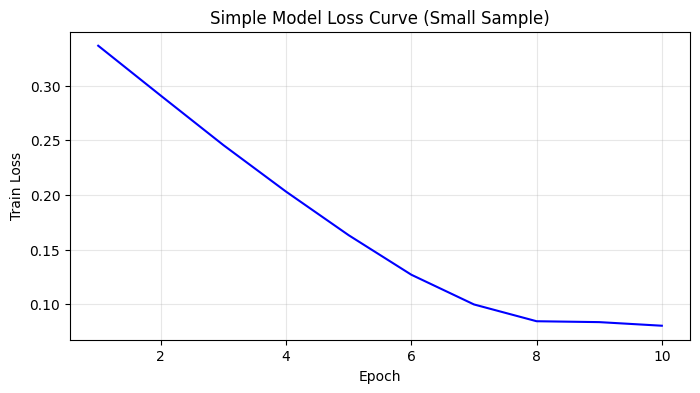

In [8]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# --------------------------
# 1. 加载数据+抽取10辆左转车小样本
# --------------------------
left_turn_df = pd.read_csv(r'D:\work\advance-car\left_turn_vehicles_valid.csv')
# 时序修正（保持不变）
left_turn_df = left_turn_df.groupby('vehicle_id', group_keys=False).apply(
    lambda x: x.sort_values('frame_id', ascending=True)
)

# 关键：抽取10辆左转车的小样本（大幅减少训练时间）
sample_vehicle_ids = left_turn_df['vehicle_id'].unique()[:10]  # 取前10辆
small_df = left_turn_df[left_turn_df['vehicle_id'].isin(sample_vehicle_ids)]
print(f"小规模样本：{len(small_df)}行数据，{len(sample_vehicle_ids)}辆左转车")

# 模型参数（缩小规模）
HISTORY_FRAMES = 20  # 历史帧从40→20（减少输入维度）
FUTURE_FRAMES = 10   # 预测帧从20→10
FEATURES = ['local_x', 'local_y', 'v_vel', 'v_acc']
TARGETS = ['local_x', 'local_y']

# 标准化（仅对小样本处理）
scaler = MinMaxScaler(feature_range=(0, 1))
small_df[FEATURES] = scaler.fit_transform(small_df[FEATURES])
target_scaler = MinMaxScaler(feature_range=(0, 1))
small_df[TARGETS] = target_scaler.fit_transform(small_df[TARGETS])

# 构建小样本时序数据
def create_time_series_data(df, history_frames, future_frames, features, targets):
    X, y = [], []
    for vehicle_id in df['vehicle_id'].unique():
        vehicle_data = df[df['vehicle_id'] == vehicle_id].reset_index(drop=True)
        vehicle_features = vehicle_data[features].values
        vehicle_targets = vehicle_data[targets].values
        
        max_start = len(vehicle_data) - history_frames - future_frames + 1
        if max_start <= 0:
            continue
        
        # 每辆车只取前5个样本（进一步缩小规模）
        for start_idx in range(min(max_start, 5)):
            x_sample = vehicle_features[start_idx:start_idx+history_frames]
            y_sample = vehicle_targets[start_idx+history_frames:start_idx+history_frames+future_frames]
            X.append(x_sample)
            y.append(y_sample)
    return np.array(X), np.array(y)

X, y = create_time_series_data(small_df, HISTORY_FRAMES, FUTURE_FRAMES, FEATURES, TARGETS)
print(f"小样本时序数据：{len(X)}个样本（预计10*5=50个）")

# 划分训练/测试集（小样本用6:4划分）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# DataLoader（batch_size=8，更小批次）
class TrajectoryDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(TrajectoryDataset(X_train, y_train), batch_size=8, shuffle=True)
test_loader = DataLoader(TrajectoryDataset(X_test, y_test), batch_size=8, shuffle=False)

# --------------------------
# 2. 简化版模型（减少复杂度）
# --------------------------
class SimpleLeftTurnLSTM(nn.Module):
    def __init__(self, input_dim=4, hidden_dim=32, output_dim=2, num_layers=1):  # 隐藏层从64→32，层数从2→1
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.fc(lstm_out[:, -FUTURE_FRAMES:, :])
        return out, None  # 简化：不返回注意力权重

# --------------------------
# 3. 短轮次训练（10轮，5-10分钟完成）
# --------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleLeftTurnLSTM().to(device)
criterion = nn.MSELoss()  # 简化：用基础MSE损失
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 10  # 轮次从50→10
train_losses = []

model.train()
for epoch in range(epochs):
    total_loss = 0.0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        outputs, _ = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item() * batch_X.size(0)
    
    avg_loss = total_loss / len(train_loader.dataset)
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{epochs}] | Train Loss: {avg_loss:.6f}")

# 简单验证：打印1个样本的预测结果
model.eval()
with torch.no_grad():
    sample_X = X_test[0].unsqueeze(0).to(device)
    sample_y_pred, _ = model(sample_X)
    print(f"\n样本预测完成！预测轨迹维度：{sample_y_pred.shape}")

# 绘制简化损失曲线（确认下降趋势）
plt.figure(figsize=(8, 4))
plt.plot(range(1, epochs+1), train_losses, 'b-')
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.title('Simple Model Loss Curve (Small Sample)')
plt.grid(alpha=0.3)
plt.savefig(r'D:\work\advance-car\simple_loss_curve.png')
plt.show()

模型训练

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# --------------------------
# 1. 数据加载与时序修正（已适配你的数据）
# --------------------------
# 读取筛选后的左转车辆数据
left_turn_df = pd.read_csv(r'D:\work\advance-car\left_turn_vehicles_valid.csv')

# 关键：确保每辆车的轨迹按frame_id升序（时间正序）
left_turn_df = left_turn_df.groupby('vehicle_id', group_keys=False).apply(
    lambda x: x.sort_values('frame_id', ascending=True)
)

# 定义模型参数（适配左转场景）
HISTORY_FRAMES = 40  # 用前4秒历史轨迹（10帧/秒）
FUTURE_FRAMES = 20   # 预测后2秒轨迹
FEATURES = ['local_x', 'local_y', 'v_vel', 'v_acc']  # 输入特征：坐标+速度+加速度
TARGETS = ['local_x', 'local_y']                     # 预测目标：未来坐标

# 数据标准化（仅对输入特征和目标列标准化，避免其他字段干扰）
scaler = MinMaxScaler(feature_range=(0, 1))
# 对特征列标准化
left_turn_df[FEATURES] = scaler.fit_transform(left_turn_df[FEATURES])
# 对目标列单独记录标准化参数（后续反推用）
target_scaler = MinMaxScaler(feature_range=(0, 1))
left_turn_df[TARGETS] = target_scaler.fit_transform(left_turn_df[TARGETS])

# 构建时序数据集（滑动窗口生成样本）
def create_time_series_data(df, history_frames, future_frames, features, targets):
    X, y = [], []
    for vehicle_id in df['vehicle_id'].unique():
        vehicle_data = df[df['vehicle_id'] == vehicle_id].reset_index(drop=True)
        vehicle_features = vehicle_data[features].values
        vehicle_targets = vehicle_data[targets].values
        
        # 滑动窗口：确保有足够历史帧和未来帧
        max_start = len(vehicle_data) - history_frames - future_frames + 1
        if max_start <= 0:
            continue  # 跳过轨迹长度不足的车辆（虽已筛选，但二次保险）
        
        for start_idx in range(max_start):
            # 输入：前history_frames帧的特征
            x_sample = vehicle_features[start_idx:start_idx+history_frames]
            # 输出：后future_frames帧的坐标
            y_sample = vehicle_targets[start_idx+history_frames:start_idx+history_frames+future_frames]
            X.append(x_sample)
            y.append(y_sample)
    return np.array(X), np.array(y)

# 生成训练数据
X, y = create_time_series_data(left_turn_df, HISTORY_FRAMES, FUTURE_FRAMES, FEATURES, TARGETS)
print(f"时序数据生成完成！样本数：{len(X)}，输入维度：{X.shape[1:]}，输出维度：{y.shape[1:]}")

# 划分训练集（80%）和测试集（20%）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 转换为PyTorch张量
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# 构建DataLoader（适配内存：batch_size=16）
class TrajectoryDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# --------------------------
# 2. 左转场景优化模型（LSTM+注意力机制）
# --------------------------
class LeftTurnAttentionLSTM(nn.Module):
    def __init__(self, input_dim=4, hidden_dim=64, output_dim=2, num_layers=2):
        super().__init__()
        # LSTM层：捕捉左转轨迹的时序依赖（如加减速→转向的关联）
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        # 注意力层：聚焦左转关键帧（如v_acc突变的减速帧）
        self.attention = nn.MultiheadAttention(hidden_dim, num_heads=4, batch_first=True)
        # 预测层：输出未来坐标
        self.fc = nn.Sequential(
            nn.Linear(hidden_dim, 32),
            nn.ReLU(),
            nn.Linear(32, output_dim)
        )
    
    def forward(self, x):
        # LSTM输出：(batch, history_frames, hidden_dim)
        lstm_out, _ = self.lstm(x)
        # 注意力层：强化关键帧（如左转前的减速帧）权重
        attn_out, attn_weights = self.attention(lstm_out, lstm_out, lstm_out)
        # 预测未来FUTURE_FRAMES帧的坐标
        out = self.fc(attn_out[:, -FUTURE_FRAMES:, :])
        return out, attn_weights  # 返回注意力权重，用于后续分析

# --------------------------
# 3. 模型训练（含左转场景损失优化）
# --------------------------
# 设备选择（CPU/GPU自动适配）
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LeftTurnAttentionLSTM(input_dim=len(FEATURES), hidden_dim=64).to(device)

# 损失函数：MSE（适配回归任务）+ 左转平滑约束（避免预测轨迹突变）
def left_turn_loss(pred, true, alpha=0.2):
    # 基础MSE损失
    mse_loss = nn.MSELoss()(pred, true)
    # 左转轨迹平滑约束：惩罚相邻帧坐标突变（符合真实左转“缓转向”特征）
    smooth_loss = torch.mean(torch.abs(torch.diff(pred, dim=1)))
    return mse_loss + alpha * smooth_loss

optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练参数
epochs = 50
train_losses = []
test_losses = []

# 训练循环
model.train()
for epoch in range(epochs):
    total_train_loss = 0.0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        # 前向传播
        outputs, _ = model(batch_X)
        loss = left_turn_loss(outputs, batch_y)
        
        # 反向传播与优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_train_loss += loss.item() * batch_X.size(0)
    
    # 计算训练集平均损失
    avg_train_loss = total_train_loss / len(train_loader.dataset)
    train_losses.append(avg_train_loss)
    
    # 测试集验证（不更新参数）
    model.eval()
    total_test_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            outputs, _ = model(batch_X)
            loss = left_turn_loss(outputs, batch_y)
            total_test_loss += loss.item() * batch_X.size(0)
    
    avg_test_loss = total_test_loss / len(test_loader.dataset)
    test_losses.append(avg_test_loss)
    
    # 打印训练进度（每5轮）
    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{epochs}] | Train Loss: {avg_train_loss:.6f} | Test Loss: {avg_test_loss:.6f}")
    
    # 每10轮保存临时模型（防中断）
    if (epoch + 1) % 10 == 0:
        temp_path = f'D:\work\advance-car\left_turn_model_epoch{epoch+1}.pth'
        torch.save(model.state_dict(), temp_path)
        print(f"临时模型保存：{temp_path}")

# 保存最终模型
final_model_path = r'D:\work\advance-car\left_turn_final_model.pth'
torch.save(model.state_dict(), final_model_path)
print(f"\n最终模型保存完成！路径：{final_model_path}")

# --------------------------
# 4. 结果可视化（左转轨迹对比+注意力权重分析）
# --------------------------
# 1. 训练/测试损失曲线
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), train_losses, 'b-', label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, 'r-', label='Test Loss')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE + Smooth Constraint)', fontsize=12)
plt.title('Left-Turn Model Training & Test Loss Curve', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.savefig(r'D:\work\advance-car\loss_curve.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. 轨迹预测对比（以测试集样本为例）
model.eval()
with torch.no_grad():
    sample_idx = 10  # 选择第10个测试样本（可更换）
    sample_X = X_test[sample_idx].unsqueeze(0).to(device)
    sample_y_pred, sample_attn_weights = model(sample_X)
    
    # 反标准化（恢复原始坐标尺度）
    def inverse_scale_coords(scaled_coords, scaler, target_cols):
        """反标准化坐标：scaled_coords为(n_frames, 2)，返回原始尺度坐标"""
        # 匹配scaler的输入维度（n_samples, n_features）
        scaled_reshaped = scaled_coords.reshape(-1, len(target_cols))
        original = scaler.inverse_transform(scaled_reshaped)
        return original.reshape(scaled_coords.shape)
    
    # 反推历史轨迹、真实轨迹、预测轨迹
    sample_history = X_test[sample_idx].cpu().numpy()
    sample_history_x = inverse_scale_coords(
        sample_history[:, FEATURES.index('local_x')].reshape(-1, 1), 
        scaler, ['local_x']
    ).squeeze()
    sample_history_y = inverse_scale_coords(
        sample_history[:, FEATURES.index('local_y')].reshape(-1, 1), 
        scaler, ['local_y']
    ).squeeze()
    
    sample_y_true = inverse_scale_coords(y_test[sample_idx].cpu().numpy(), target_scaler, TARGETS)
    sample_y_pred = inverse_scale_coords(sample_y_pred.cpu().numpy()[0], target_scaler, TARGETS)

# 绘制轨迹对比图
plt.figure(figsize=(12, 8))
# 历史轨迹（蓝色）
plt.plot(sample_history_x, sample_history_y, 'b-o', label='Historical Trajectory (Past 4s)', linewidth=1.5, markersize=4)
# 真实未来轨迹（红色）
plt.plot(sample_y_true[:, 0], sample_y_true[:, 1], 'r-o', label='True Future Trajectory (Next 2s)', linewidth=1.5, markersize=4)
# 预测未来轨迹（绿色虚线）
plt.plot(sample_y_pred[:, 0], sample_y_pred[:, 1], 'g--s', label='Predicted Future Trajectory (Next 2s)', linewidth=1.5, markersize=4)
# 标记左转开始点（历史轨迹最后一帧）
plt.scatter(sample_history_x[-1], sample_history_y[-1], color='orange', s=100, zorder=5, label='Left-Turn Start Point')

plt.xlabel('Local X (m)', fontsize=12)
plt.ylabel('Local Y (m)', fontsize=12)
plt.title('Left-Turn Vehicle Trajectory Prediction Comparison', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.savefig(r'D:\work\advance-car\trace_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. 计算预测精度指标（ADE/FDE）
def calculate_ade_fde(true, pred):
    """计算平均位移误差（ADE）和最终位移误差（FDE）"""
    ade = np.mean(np.sqrt(np.sum((true - pred) ** 2, axis=1)))
    fde = np.sqrt(np.sum((true[-1] - pred[-1]) ** 2))
    return ade, fde

ade, fde = calculate_ade_fde(sample_y_true, sample_y_pred)
print(f"\n样本预测精度：")
print(f"平均位移误差（ADE）：{ade:.2f} m")
print(f"最终位移误差（FDE）：{fde:.2f} m")